In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset

data = pd.read_csv(r"C:\Users\HARSHIT VARTAK\Downloads\HR_comma_sep.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
# Explore the dataset

# Display the first few rows of the dataset

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Display information about the dataset, including data types and missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Display summary statistics of numerical features

data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


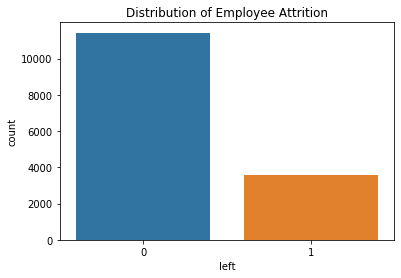

In [6]:
# Visualize the data

sns.countplot(x='left', data=data)
plt.title('Distribution of Employee Attrition')
plt.show()

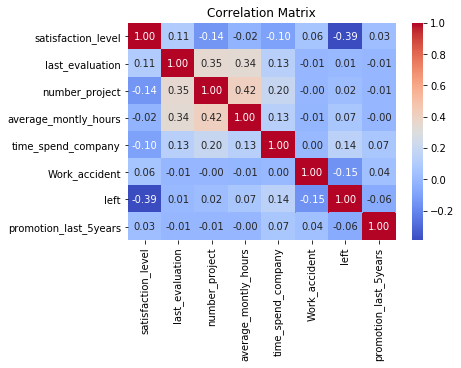

In [7]:
# Explore the relationship between different features and employee attrition

# For example, let's visualize the correlation matrix

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Split the data into features (X) and target variable (y)

X = data.drop('left', axis=1)
y = data['left']

In [9]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
data["Department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [11]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
9838,1.00,0.61,3,188,4,0,0,product_mng,low
7689,0.16,0.78,4,196,5,0,0,technical,high
6557,0.80,0.80,3,175,2,0,0,RandD,medium
6872,0.66,0.86,4,112,6,0,0,accounting,medium
820,0.11,0.93,7,284,4,0,0,technical,low
...,...,...,...,...,...,...,...,...,...
5191,0.52,0.96,4,246,3,0,0,support,low
13418,0.49,0.65,4,233,7,0,0,sales,medium
5390,0.66,0.73,5,249,2,0,0,support,medium
860,0.79,1.00,4,218,5,0,0,sales,low


In [13]:
# transforming categorical data to numerical

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
colname=["salary"]
colname2=["Department"]
for x in colname:
    X_train[x]=le.fit_transform(X_train[x])
    X_test[x]=le.fit_transform(X_test[x])
    X_train['salary']=X_train['salary'].map({"low":0, "medium":1 , "high":2})
    X_test['salary']=X_test['salary'].map({"low":0, "medium":1,"high":2})
    
    
    X_train[x]=le.fit_transform(X_train[x])
    X_test[x]=le.fit_transform(X_test[x])
    X_train['Department']=X_train['Department'].map({"sales":1,"technical":2,"support":3,"IT":4,"product_mng":5,"marketing":6,"RandD":7,"accounting":8,"hr":9,"management":10})
    X_test['Department']=X_test['Department'].map({"sales":1,"technical":2,"support":3,"IT":4,"product_mng":5,"marketing":6,"RandD":7,"accounting":8,"hr":9,"management":10})

C:\Users\HARSHIT VARTAK\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HARSHIT VARTAK\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\HARSHIT VARTAK\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [14]:
# Create a logistic regression model

model = LogisticRegression()

In [15]:
# Train the model

model.fit(X_train, y_train)

C:\Users\HARSHIT VARTAK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# Make predictions on the test set

y_pred = model.predict(X_test)

In [17]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [18]:
# Display the evaluation metrics

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7276666666666667
Confusion Matrix:
[[2165  129]
 [ 688   18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      2294
           1       0.12      0.03      0.04       706

    accuracy                           0.73      3000
   macro avg       0.44      0.48      0.44      3000
weighted avg       0.61      0.73      0.65      3000

